# This notebook shows the experiments performed on IRF4 enhancer.

#### It consists of:
*    Loading the IRF4 enhancer sequence with different motif modifications.
*    Loading saturation mutagenesis assay performed on IRF4 enhancer by Kircher et al.
*    Showing individual mutations generating repressor binding sites on IRF4 enhancer.
*    Plotting the findings. 


#### In vitro saturation mutagenesis assay value file is in ./data/irf4/
#### Luciferase values are in ./data/luciferase folder
#### Figures are saved to ./figures/irf4 folder

### General imports


In [1]:
import sys  
import os
import pickle
import utils
import numpy as np
import scipy
import tensorflow as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Loading DeepMEL2 data to be used for the initialization of shap.DeepExplainer


In [2]:
print('Loading data...')
f = open('./data/deepmel2/DeepMEL2_nonAugmented_data.pkl', "rb")
nonAugmented_data_dict = pickle.load(f)
f.close()

Loading data...


### Loading the models and initializing shap.DeepExplainer


In [3]:
print('Loading model...')
import shap
tf.disable_eager_execution()
rn=np.random.choice(nonAugmented_data_dict["train_data"].shape[0], 250, replace=False)
model_dict = {}
exp_dict = {} 

name = "deepmel2"
model_json_file = "models/deepmel2/model.json"
model_hdf5_file = "models/deepmel2/model_epoch_07.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


name = "deepmel2_gabpa"
model_json_file = "models/deepmel2_gabpa/model.json"
model_hdf5_file = "models/deepmel2_gabpa/model_epoch_09.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


name = "deepmel"
model_json_file = "models/deepmel/model.json"
model_hdf5_file = "models/deepmel/model_best_loss.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


Loading model...


In [4]:
nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}

### Loading the IRF4 enhancer sequence with different motif modifications.

In [5]:
irf4_onehot = {}
irf4_onehot["more_ZEB2"] = utils.one_hot_encode_along_row_axis("GCTGCCATTGGTGTGGATTTTAAGTTGGGGAGGGTCGGGCGTGTCCGCCTGTTGGAATATGCTTCTCAGGTCTTCTGGGAAACAGGTGTTTTGTGGAAGTGGAAGATTTTGGAAGTAGTACCTTATCATGTGAAACCACAGGGCAGCTGATCTCTTCAGGCTTTCTTGATGTGAATGACAGCTTTGTTTCATCCACCTTGGTAGGTAAAAGAAGGTAAATTCCCCTGTGGTACTTTTGGTGCCAGGTTTAGCCATATGACGAAGCTTTACCTAAAACAGTACAAGTATCTCCATTGTCCTTTATGATCCTCCATGAGTGTTTTCACCTAGTCTGATGAAGGGTTCACTCCAGTCTTTTCGGATGATAAAATGCTTCGGCTGTCAGTCTAATAAGGGATTCCCTGAGGAGTTTGGAGGCTGTAAGAGCACCCCCCGTCTCAATGCCAGTGCTTCTTATCTCAGCCTCTCCTGCACTCCTTTACCCCCGTCTCGATGCCAGT")
irf4_onehot["no_ZEB2"]   = utils.one_hot_encode_along_row_axis("GCTGCCATTGGTGTGGATTTTAAGTTGGGGAGGGTCGGGCGTGTCCGCCTGTTGGAATATGCTTCTCGGATCTTCTGGGAAACAGATGTTTTGTGGAAGTGGAAGATTTTGGAAGTAGTGCCTTATCATGTGAAACCACAGGGCAGCTGATCTCTTCAGGCTTTCTTGATGTGAATGACAGCTTTGTTTCATCCACTTTGGTGGGTAAAAGAAGGCAAATTCCCCTGTGGTACTTTTGGTGCCGGATTTAGCCATATGACGAAGCTTTACATAAAACAGTACAAGTATCTCCATTGTCCTTTATGATCCTCCATGAGTGTTTTCACTTAGTCTGATGAAGGGTTCACTCCAGTCTTTTCGGATGATAAAATGCTTCGGCTGTCAGTCTAATAAGGGATTCCCTGAGGAGTTTGGAGGCTGTAAGAGCACCCCCCGTCTCAATGCCAGTGCTTCTTATCTCAGCCTCTCCTGCACTCCTTTACCCCCGTCTCGATGCCAGT")
irf4_onehot["no_MITF"]   = utils.one_hot_encode_along_row_axis("GCTGCCATTGGTGTGGATTTTAAGTTGGGGAGGGTCGGGCGTGTCCGCCTGTTGGAATATGCTTCTCAGGTCTTCTGGGAAACAGATGTTTTGTGGAAGTGGAAGATTTTGGAAGTAGTGCCTTATAATGTAAAACCACAGGGCAGCTGATCTCTTCAGGCTTTCTTGATGTGAATGACAGCTTTGTTTCATCCACTTTGGTGGGTAAAAGAAGGCAAATTCCCCTGTGGTACTTTTGGTGCCAGGTTTAGCAATATAACGAAGCTTTACATAAAACAGTACAAGTATCTCCATTGTCCTTTATGATCCTCCATGAGTGTTTTCACTTAGTCTGATGAAGGGTTCACTCCAGTCTTTTCGGATGATAAAATGCTTCGGCTGTCAGTCTAATAAGGGATTCCCTGAGGAGTTTGGAGGCTGTAAGAGCACCCCCCGTCTCAATGCCAGTGCTTCTTATCTCAGCCTCTCCTGCACTCCTTTACCCCCGTCTCGATGCCAGT")
irf4_onehot["no_SOX10"]  = utils.one_hot_encode_along_row_axis("GCTGCCATTGGTGTGGATTTTAAGTTGGGGAGGGTCGGGCGTGTCCGCCTGTTGGAATATGCTTCTCAGGTCTTCTGGGAAACAGATGTTTTGTGGAAGTGGAAGATTTTGGAAGTAGTGCCTTATCATGTGAAACCACAGGGCAGCTGATCTCTTCAGGCTTTCTTGATGTGGATGACAGCTTGTGTTCATCCACTTTGGTGGGTAAAAGAAGGCAAATTCCCCTGTGGTACTTTTGGTGCCAGGTTTAGCCATATGACGAAGCTTTACATAAAACAGTACAGGTATCTCCATGTGCCTTTATGATCCTCCATGAGTGTTTTCACTTAGTCTGATGAAGGGTTCACTCCAGTCTTTTCGGATGATAAAATGCTTCGGCTGTCAGTCTAATAAGGGATTCCCTGAGGAGTTTGGAGGCTGTAAGAGCACCCCCCGTCTCAATGCCAGTGCTTCTTATCTCAGCCTCTCCTGCACTCCTTTACCCCCGTCTCGATGCCAGT")
irf4_onehot["wild-type"] = utils.one_hot_encode_along_row_axis("GCTGCCATTGGTGTGGATTTTAAGTTGGGGAGGGTCGGGCGTGTCCGCCTGTTGGAATATGCTTCTCAGGTCTTCTGGGAAACAGATGTTTTGTGGAAGTGGAAGATTTTGGAAGTAGTGCCTTATCATGTGAAACCACAGGGCAGCTGATCTCTTCAGGCTTTCTTGATGTGAATGACAGCTTTGTTTCATCCACTTTGGTGGGTAAAAGAAGGCAAATTCCCCTGTGGTACTTTTGGTGCCAGGTTTAGCCATATGACGAAGCTTTACATAAAACAGTACAAGTATCTCCATTGTCCTTTATGATCCTCCATGAGTGTTTTCACTTAGTCTGATGAAGGGTTCACTCCAGTCTTTTCGGATGATAAAATGCTTCGGCTGTCAGTCTAATAAGGGATTCCCTGAGGAGTTTGGAGGCTGTAAGAGCACCCCCCGTCTCAATGCCAGTGCTTCTTATCTCAGCCTCTCCTGCACTCCTTTACCCCCGTCTCGATGCCAGT")

### Loading saturation mutagenesis assay performed on IRF4 enhancer by Kircher et al.

In [6]:
def get_irf4_in_vitro_mpra_values(shift=396106, pval=0.00001):
    irf4_pos = []
    irf4_score = []
    irf4_pvalue = []
    with open('data/irf4/GRCh37_IRF4.tsv','r') as irf4file:
        for line in irf4file:
            irf4_pos.append(int(line.strip().split('\t')[1]))
            irf4_score.append(float(line.strip().split('\t')[7]))
            irf4_pvalue.append(float(line.strip().split('\t')[8]))

    irf4 = {}
    with open('data/irf4/GRCh37_IRF4.tsv','r') as irf4file:
        for line in irf4file:
            splitted_line=line.strip().split('\t')
            if int(splitted_line[1]) not in irf4:
                irf4[int(splitted_line[1])]= {'A':[], 'C':[], 'G':[], 'T':[]}
            #if splitted_line[3]=='-':
            #    irf4[int(splitted_line[1])][splitted_line[2]]=[float(splitted_line[7]),float(splitted_line[8])]
            if splitted_line[3]!='-' and int(splitted_line[4])>=10:
                irf4[int(splitted_line[1])][splitted_line[3]]=[float(splitted_line[7]),float(splitted_line[8])]

    array_={'A':np.empty(500),'C':np.empty(500),'G':np.empty(500),'T':np.empty(500)}
    array_['A'][:]=np.nan
    array_['C'][:]=np.nan
    array_['T'][:]=np.nan
    array_['G'][:]=np.nan
    for i in range(500):
        if i+shift in irf4:
            for key in irf4[i+shift]:
                if irf4[i+shift][key]!=[]:
                    if irf4[i+shift][key][1]<pval:
                        array_[key][i] = irf4[i+shift][key][0]
    array_['A'][array_['A']==0]=None
    array_['C'][array_['C']==0]=None
    array_['G'][array_['G']==0]=None
    array_['T'][array_['T']==0]=None  
    return array_

def calculate_mutagenesis(model, seq_onehot, topic):
    
    mutagenesis_X = utils.create_saturation_mutagenesis_x(seq_onehot)
    prediction_mutagenesis_X = model.predict([mutagenesis_X["X"],mutagenesis_X["X"][:,::-1,::-1]])
    original_prediction = model.predict([seq_onehot,seq_onehot[:,::-1,::-1]])
    topic = topic-1
    seq_shape = (500,4)
    
    arr_a = np.zeros(500)
    arr_c = np.zeros(500)
    arr_g = np.zeros(500)
    arr_t = np.zeros(500)
    delta_pred = original_prediction[:,topic] - prediction_mutagenesis_X[:,topic]
    for i,mut in enumerate(mutagenesis_X["ids"]):
        if mut.endswith("A"):
            arr_a[int(mut.split("_")[0])]=delta_pred[i]
        if mut.endswith("C"):
            arr_c[int(mut.split("_")[0])]=delta_pred[i]
        if mut.endswith("G"):
            arr_g[int(mut.split("_")[0])]=delta_pred[i]
        if mut.endswith("T"):
            arr_t[int(mut.split("_")[0])]=delta_pred[i]

    arr_a[arr_a == 0] = None
    arr_c[arr_c == 0] = None
    arr_g[arr_g == 0] = None
    arr_t[arr_t == 0] = None
    
    return {"A":arr_a, "C":arr_c, "G":arr_g, "T":arr_t}

### Calculating in silico saturation mutagenesis and matching with the in vitro saturation mutagenesis 

In [7]:
irf4_kircher_array = get_irf4_in_vitro_mpra_values(shift=396106, pval=0.00001)
deepmel2_arr = calculate_mutagenesis(model=model_dict["deepmel2"], seq_onehot=irf4_onehot["wild-type"], topic = 16)

kircher_mpra = []
deepmel2_mpra = []
for i in range(500):
    if not np.isnan(irf4_kircher_array['A'][i]):
        kircher_mpra.append(irf4_kircher_array['A'][i])
        deepmel2_mpra.append(-1*deepmel2_arr['A'][i])

    if not np.isnan(irf4_kircher_array['C'][i]):
        kircher_mpra.append(irf4_kircher_array['C'][i])
        deepmel2_mpra.append(-1*deepmel2_arr['C'][i])

    if not np.isnan(irf4_kircher_array['G'][i]):
        kircher_mpra.append(irf4_kircher_array['G'][i])
        deepmel2_mpra.append(-1*deepmel2_arr['G'][i])

    if not np.isnan(irf4_kircher_array['T'][i]):
        kircher_mpra.append(irf4_kircher_array['T'][i])
        deepmel2_mpra.append(-1*deepmel2_arr['T'][i])

### Plotting in silico versus in vitro saturation mutagenesis on IRF4 enhancer

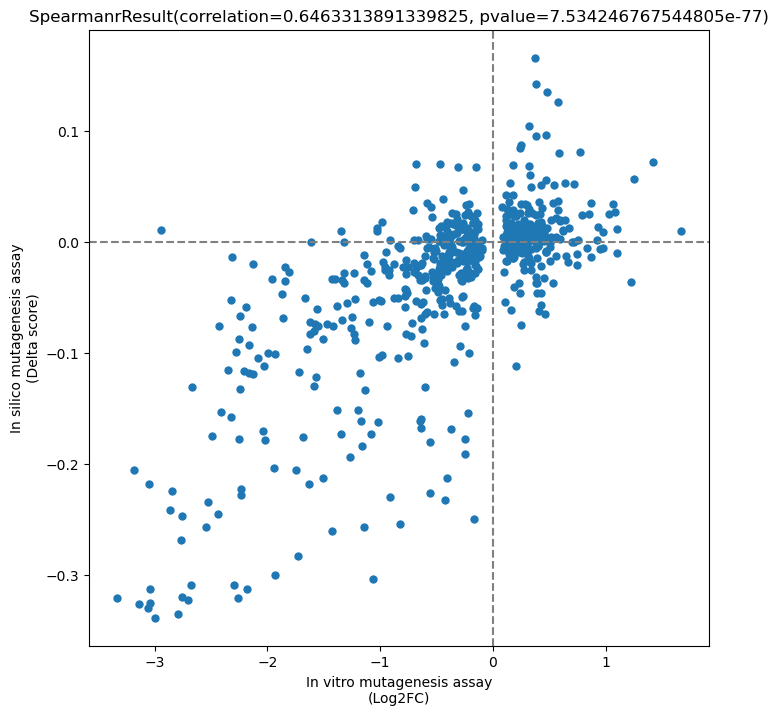

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.scatter(np.array(kircher_mpra),np.array(deepmel2_mpra),linewidths=0)
import scipy
scipy.stats.spearmanr(np.array(kircher_mpra),np.array(deepmel2_mpra),axis=None)

ax.set_title(scipy.stats.spearmanr(np.array(kircher_mpra),np.array(deepmel2_mpra),axis=None))
ax.set_xlabel("In vitro mutagenesis assay\n(Log2FC)")
ax.set_ylabel("In silico mutagenesis assay\n(Delta score)")
ax.axvline(x=0,linestyle='--',color='gray')
ax.axhline(y=0,linestyle='--',color='gray')

plt.savefig("figures/irf4/IRF4_scatter_insilicoMPRA_vs_invitroMPRA.pdf",transparent=True)

### Plotting nucleotide contribution scores and in silico / in vitro saturation mutagenesis values of IRF4 enhancer

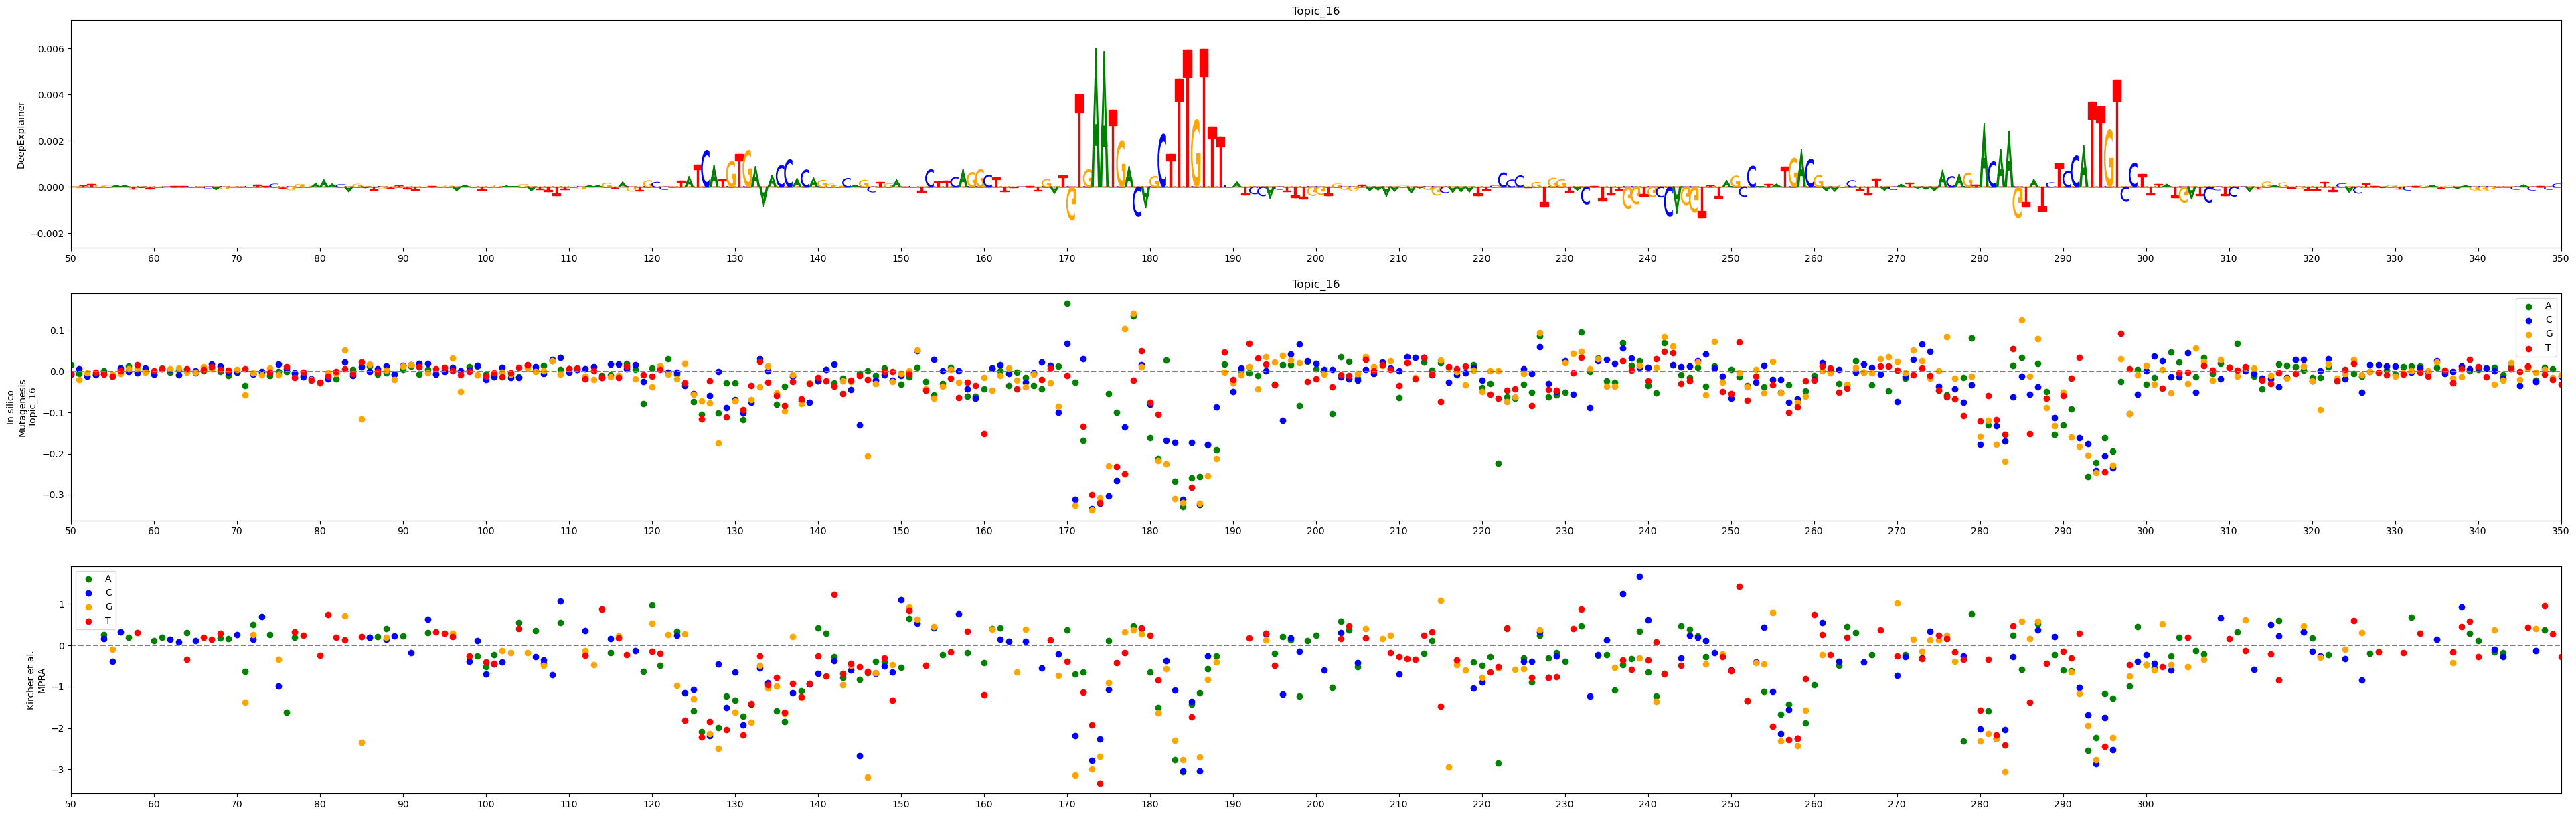

In [9]:
ntrack = 3
fig = plt.figure(figsize=(48,ntrack*5))

st = 50
end = 350

start_x = np.copy(irf4_onehot["wild-type"])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 16)
ax2 = utils.plot_mutagenesis_givenax_fast_withrc(model=model_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 16)


ax3 = fig.add_subplot(ntrack,1,3)
ax3.set_ylabel('Kircher et al.\nMPRA')
ax3.scatter(range(500),irf4_kircher_array['A'],label='A',color='green')
ax3.scatter(range(500),irf4_kircher_array['C'],label='C',color='blue')
ax3.scatter(range(500),irf4_kircher_array['G'],label='G',color='orange')
ax3.scatter(range(500),irf4_kircher_array['T'],label='T',color='red')
ax3.set_xlim((0,500))
#ax.axvline(x=185,linestyle='-',color='blue')
ax3.legend()
ax3.axhline(y=0,linestyle='--',color='gray')
ax3.set_xticks(np.arange(0, end-st+1, 10))

ax1.set_xlim([st,end])
ax2.set_xlim([st,end])
_ = ax3.set_xlim([st,end])

plt.savefig("figures/irf4/IRF4_DX_insilicoMPRA_invitroMPRA.pdf",transparent=True)

### Plotting nucleotide contribution scores after applying the repressor creating mutations

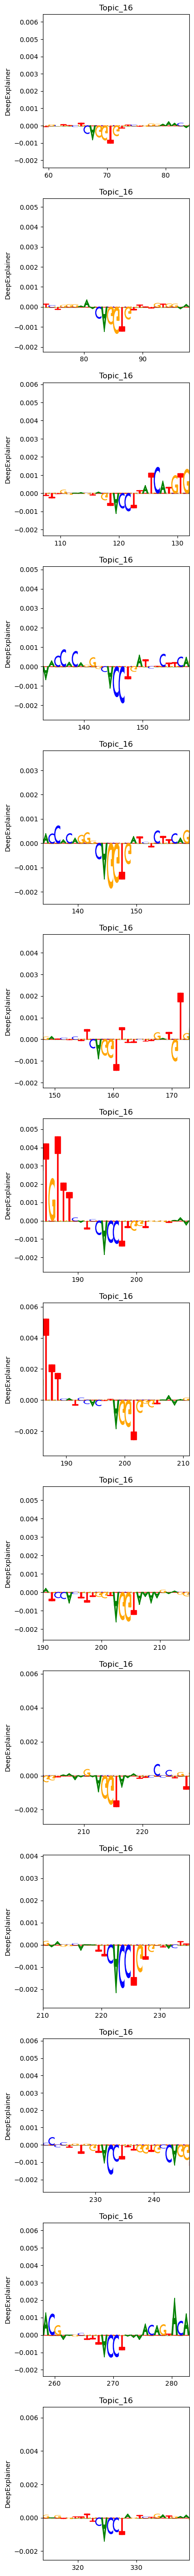

In [10]:
ntrack = 14
fig = plt.figure(figsize=(4,ntrack*5))

for track,mut_ in enumerate(["71_G","85_G","119_A","145_C","146_G","160_T","196_C","198_A","202_A","215_T","222_A","233_C","270_C","326_C"]):
    start_x = np.copy(irf4_onehot["wild-type"])
    st = int(mut_.split("_")[0])-12
    end = int(mut_.split("_")[0])+13
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')

    ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=track+1, seq_onehot=start_x, class_no = 16)
    ax1.set_xlim([st,end])

plt.savefig("figures/irf4/IRF4_DX_ZEB2_creating_muts.pdf",transparent=True)

### Plotting nucleotide contribution scores for the IRF4 enhancer sequence with different motif modifications.

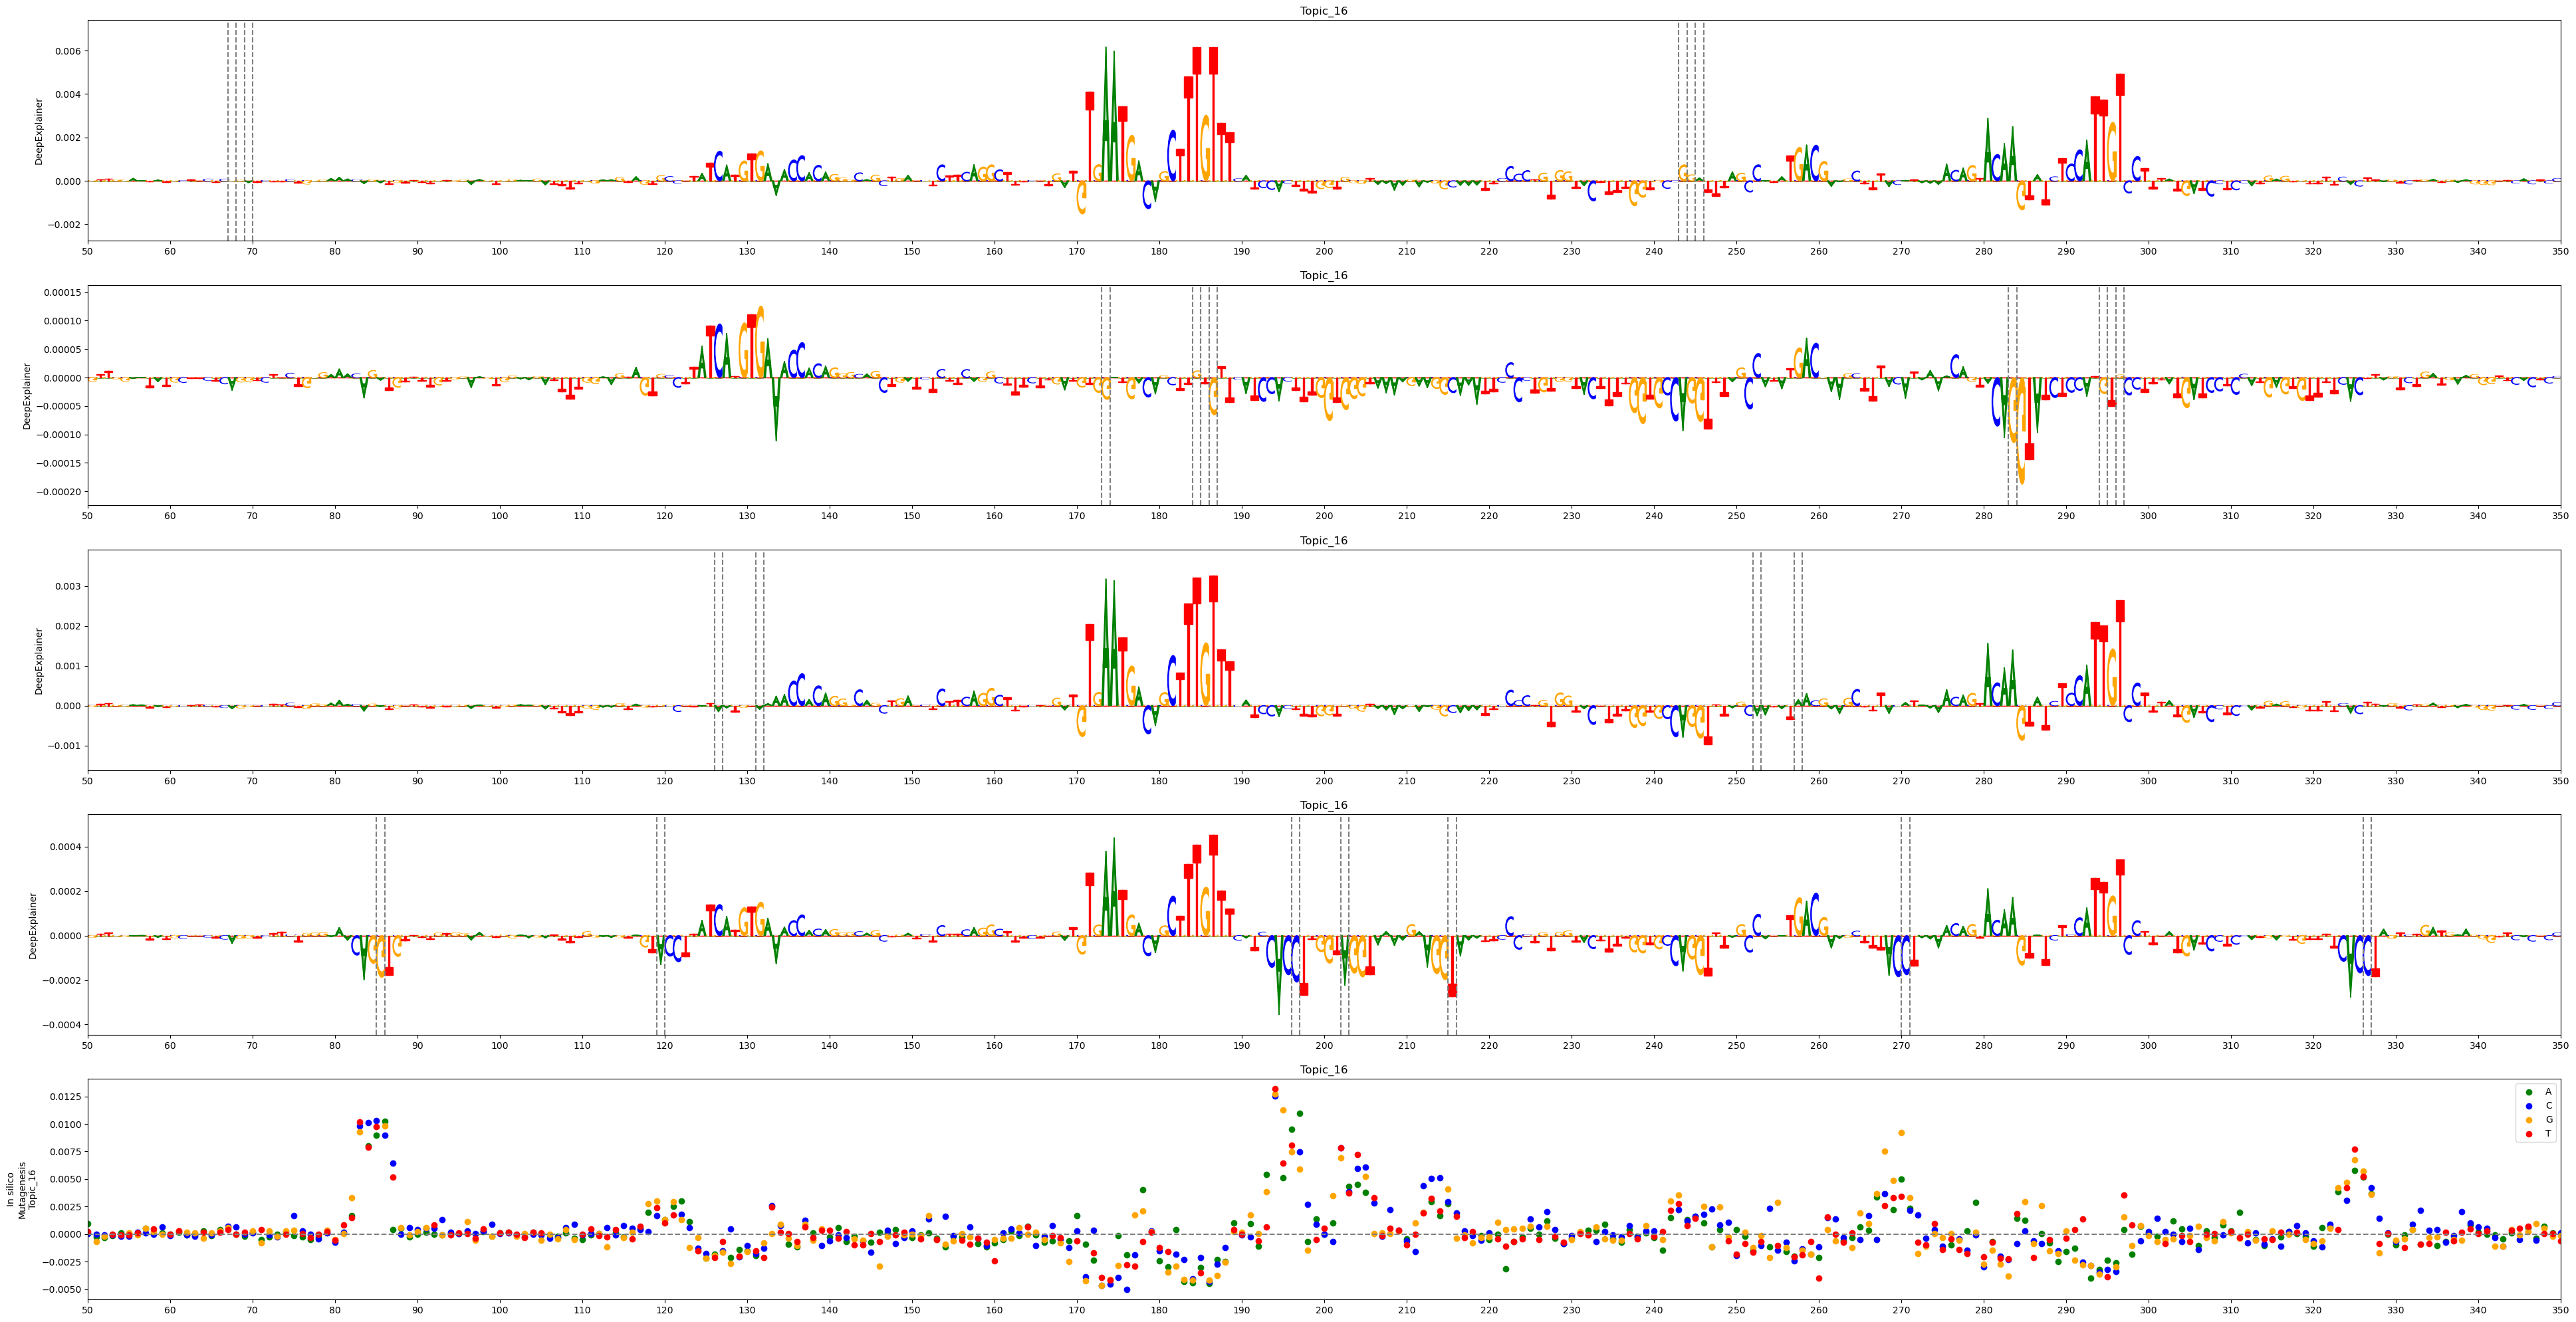

In [11]:
ntrack = 5
fig = plt.figure(figsize=(48,ntrack*5))

st = 50
end = 350

start_x = np.copy(irf4_onehot["wild-type"])
muts = ["67_G","69_A","243_G","245_A"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax2 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 16)
for i, mut_ in enumerate(muts):
    ax2.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax2.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")


start_x = np.copy(irf4_onehot["wild-type"])
muts = ["173_G","184_G","185_T","186_G","283_G","294_G","295_T","296_G",]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax3 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 16)
for i, mut_ in enumerate(muts):
    ax3.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax3.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")


start_x = np.copy(irf4_onehot["wild-type"])
muts = ["126_A","131_A","252_A","257_A"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax4 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=start_x, class_no = 16)
for i, mut_ in enumerate(muts):
    ax4.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax4.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")


start_x = np.copy(irf4_onehot["wild-type"])
muts = ["85_G","119_A","196_C","202_A","215_T","270_C","326_C"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax5 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=start_x, class_no = 16)
ax6 = utils.plot_mutagenesis_givenax_fast_withrc(model=model_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=5, seq_onehot=start_x, class_no = 16)
for i, mut_ in enumerate(muts):
    ax5.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax5.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")

ax2.set_xlim([st,end])
ax3.set_xlim([st,end])
ax4.set_xlim([st,end])
ax5.set_xlim([st,end])
_ = ax6.set_xlim([st,end])

plt.savefig("figures/irf4/IRF4_noZeb_noSox_noMitf_moreZeb.pdf",transparent=True)

### Loading luciferase results

In [12]:
luciferase_dict = {"ids":[],"values":[]}
with open("data/luciferase/IRF4.txt","r") as fr:
    for line in fr:
        if line.startswith("id"):
            continue
        sep = line.strip().split("\t")
        luciferase_dict["ids"].append(sep[0])
        luciferase_dict["values"].append(sep[1:])
luciferase_dict["values"] = np.array(luciferase_dict["values"],dtype="float")

### Plotting luciferase results

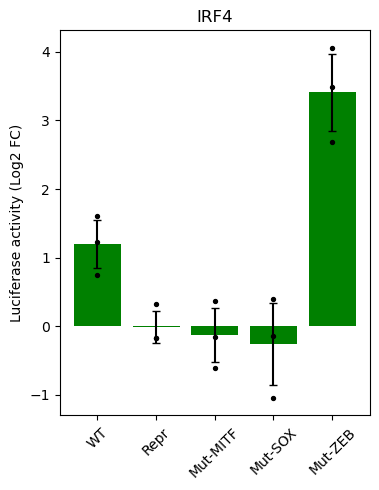

In [13]:
plt.figure(figsize=(4,5))
plt.title("IRF4")

mean = np.mean(np.log2(luciferase_dict["values"]),axis=1)
std = np.std(np.log2(luciferase_dict["values"]),axis=1)

index = np.argsort(mean)[::-1]
temp = sorted(mean)[::-1]
res = [temp.index(i) for i in mean]

plt.bar(range(len(mean)),mean,color="green",label="",yerr=std,capsize=3)

for i in (range(len(mean))):
    for k in np.log2(luciferase_dict["values"][i]):
        plt.scatter(i,k,color="black",zorder=10,s=8)

_ = plt.xticks(range(len(mean)),np.array(luciferase_dict["ids"]),rotation=45)
plt.ylabel("Luciferase activity (Log2 FC)")

plt.savefig("figures/irf4/IRF4_mutations_luciferase.pdf",transparent=True)

### Calculating and plotting prediction scores for the IRF4 enhancer sequence with different motif modifications.

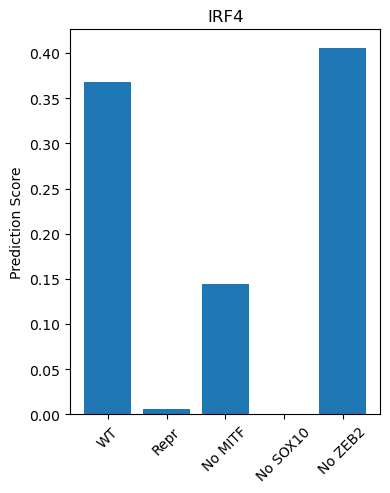

In [14]:
plt.figure(figsize=(4,5))

topic=16
topic=topic-1
pred = []

start_x = np.copy(irf4_onehot['wild-type'])
pred.append(model_dict["deepmel2"].predict([start_x,start_x[:,::-1,::-1]])[0,topic])

start_x = np.copy(irf4_onehot['more_ZEB2'])
pred.append(model_dict["deepmel2"].predict([start_x,start_x[:,::-1,::-1]])[0,topic])

start_x = np.copy(irf4_onehot['no_MITF'])
pred.append(model_dict["deepmel2"].predict([start_x,start_x[:,::-1,::-1]])[0,topic])

start_x = np.copy(irf4_onehot['no_SOX10'])
pred.append(model_dict["deepmel2"].predict([start_x,start_x[:,::-1,::-1]])[0,topic])

start_x = np.copy(irf4_onehot['no_ZEB2'])
pred.append(model_dict["deepmel2"].predict([start_x,start_x[:,::-1,::-1]])[0,topic])

_ = plt.bar(range(5),pred)
plt.title("IRF4")
plt.xticks(range(5),['WT',"Repr","No MITF","No SOX10","No ZEB2"],rotation=45)
plt.ylabel("Prediction Score")

plt.savefig("figures/irf4/IRF4_mutations_prediction.pdf",transparent=True)